## The Spark Foundation- Data Science and Business Analytics Internship
### Task 2: Prediction using unsupervised machine learning
### Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters
### and represent it visually
### Author: Veerdhaval Pradeep Barkade

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
#Importing iris dataset
DataF=pd.read_csv("Iris.csv")

In [3]:
DataF.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
DataF.shape

(150, 6)

In [5]:
DataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
DataF.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
DataF.drop("Id",axis=1,inplace=True)

In [8]:
DataF

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


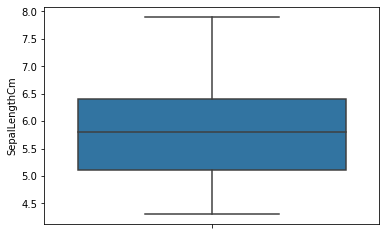

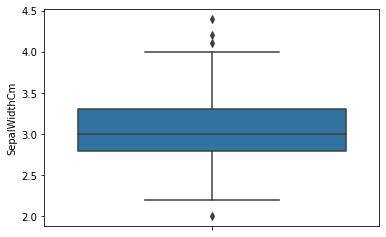

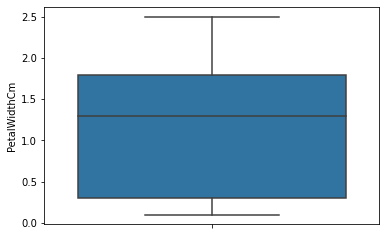

In [9]:
DataF1=DataF[["SepalLengthCm","SepalWidthCm","PetalWidthCm"]]
for i in DataF1:
    sbn.boxplot(y=DataF1[i])
    plt.show()

#### SepalWidthCm column contains some outlier values
### Removing outlier values using IQR technique

In [10]:
#Finding lower and upper bound or values in dataset
q1=DataF["SepalWidthCm"].quantile(0.25)
q3=DataF["SepalWidthCm"].quantile(0.75)
iqr=q3-q1
Lower_bound=q1-1.5*iqr
Upper_bound=q3+1.5*iqr
print(Lower_bound)
print(Upper_bound)

2.05
4.05


In [11]:
#Removing outlier values
DataF=DataF[(DataF["SepalWidthCm"]>=Lower_bound) & (DataF["SepalWidthCm"]<=Upper_bound)]
DataF.shape

(146, 5)

### Finding optimum number of clusters for K-means classifier using Elbow method
#### Elbow method is used to determine no. of clusters

In [13]:
x=DataF.iloc[:,[0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

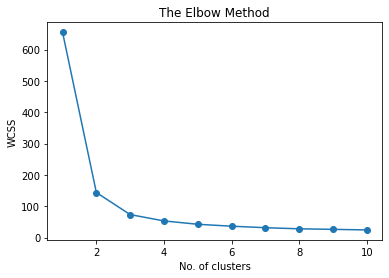

In [14]:
#Plotting results onto a line graph
plt.plot(range(1,11),wcss,marker="o")
plt.title("The Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS") #within cluster sum of squares
plt.show()

#### From above graph we can select no. of cluster as 3
### Applying K-means to dataset

In [15]:
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [16]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Visualising clusters

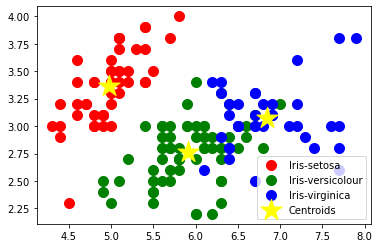

In [17]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 500, c = 'yellow', label = 'Centroids',marker='*')

plt.legend()